In [39]:
import pandas as pd
import numpy as np
import time
import datetime
import dateutil.parser 

The data is obtained using 

gcloud compute operations list

Get the machinetype (n1-standard-8 etc) from gcloud compute instances list


In [40]:
pd.read_csv("f20.txt")

,NAME TYPE TARGET HTTP_STATUS STATUS TIMESTAMP
0,operation-1550515303308-5822f79df5b38-47ee07e5...
1,operation-1550584279470-5823f892c1047-dc898c58...
2,operation-1550584319014-5823f8b8775db-02b11454...
3,operation-1550584319015-5823f8b877880-0f4fa9f9...
4,operation-1550591088537-582411f063050-a56dab24...
5,operation-1550614643706-582469b058979-6c6cb754...
6,operation-1550614648723-582469b5219bc-9d63e987...
7,operation-1550614719322-582469f8758c9-489cadb4...
8,operation-1550614804007-58246a4938b20-29dd31a1...
9,operation-1550518941803-5823052be65dc-007c9ad5...


In [41]:
import json

In [42]:
fc=open("f20.json")

In [43]:
jdata = json.load(fc)

In [44]:
jdata

[{u'endTime': u'2019-02-18T10:44:32.429-08:00',
  u'id': u'2290850289894769287',
  u'insertTime': u'2019-02-18T10:41:44.042-08:00',
  u'kind': u'compute#operation',
  u'name': u'operation-1550515303308-5822f79df5b38-47ee07e5-23c8e89e',
  u'operationType': u'insert',
  u'progress': 100,
  u'selfLink': u'https://www.googleapis.com/compute/v1/projects/first-220321/global/operations/operation-1550515303308-5822f79df5b38-47ee07e5-23c8e89e',
  u'startTime': u'2019-02-18T10:41:45.314-08:00',
  u'status': u'DONE',
  u'targetId': u'863184499071468168',
  u'targetLink': u'https://www.googleapis.com/compute/v1/projects/first-220321/global/images/mp1',
  u'user': u'prateek3.14@gmail.com'},
 {u'endTime': u'2019-02-19T05:51:49.388-08:00',
  u'id': u'9214788405173532471',
  u'insertTime': u'2019-02-19T05:51:20.128-08:00',
  u'kind': u'compute#operation',
  u'name': u'operation-1550584279470-5823f892c1047-dc898c58-819cf03f',
  u'operationType': u'insert',
  u'progress': 100,
  u'selfLink': u'https://w

In [45]:
out = dict()
for entry in jdata:
    eid = entry['id']
    iname = entry['targetLink']
    if entry['operationType']=='insert':
        out[iname] = (entry, np.nan)
    if entry['operationType']=='compute.instances.preempted':
        orig_entry = out[iname][0]
        start_time = orig_entry['insertTime']
        end_time = entry['insertTime']
        ttl = ttl_in_minutes(start_time, end_time)
        out[iname] = (orig_entry, ttl)

In [46]:
def ttl_in_minutes(start_time, end_time):
    s=dateutil.parser.parse(start_time)
    e=dateutil.parser.parse(end_time)
    diff = e-s
    return diff.total_seconds()

In [47]:
string_time='2019-02-19T11:43:16.099-08:00'

In [48]:
for e in list(out):
    #print(out[e][1])
    if np.isnan(out[e][1]):
        print("deleting")
        out.pop(e) 

deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting
deleting


In [49]:
out

{u'https://www.googleapis.com/compute/v1/projects/first-220321/zones/europe-north1-a/instances/aardvark27': ({u'endTime': u'2019-02-18T11:42:52.506-08:00',
   u'id': u'9133208911590372464',
   u'insertTime': u'2019-02-18T11:42:23.437-08:00',
   u'kind': u'compute#operation',
   u'name': u'operation-1550518941803-5823052be65dc-007c9ad5-db373ff0',
   u'operationType': u'insert',
   u'progress': 100,
   u'selfLink': u'https://www.googleapis.com/compute/v1/projects/first-220321/zones/europe-north1-a/operations/operation-1550518941803-5823052be65dc-007c9ad5-db373ff0',
   u'startTime': u'2019-02-18T11:42:26.186-08:00',
   u'status': u'DONE',
   u'targetId': u'7290062617505608817',
   u'targetLink': u'https://www.googleapis.com/compute/v1/projects/first-220321/zones/europe-north1-a/instances/aardvark27',
   u'user': u'prateeks@first-220321.iam.gserviceaccount.com',
   u'zone': u'https://www.googleapis.com/compute/v1/projects/first-220321/zones/europe-north1-a'},
  86460.7),
 u'https://www.goo

In [50]:
s=list(zip(*(out.values())))[1]

In [51]:
print(s)

(86460.7, 2363.482, 86439.649, 88456.938, 895.826, 38889.587, 88462.394, 86474.189, 4648.701, 86488.147, 22303.542, 2392.038, 86480.014, 4810.814, 88928.863, 401.218, 1245.761, 88949.557, 88954.991, 86467.604, 76766.687, 6563.444, 86462.225)


In [52]:
import matplotlib.pyplot as plt

In [53]:
np.nancumsum(s)

AttributeError: 'module' object has no attribute 'nancumsum'

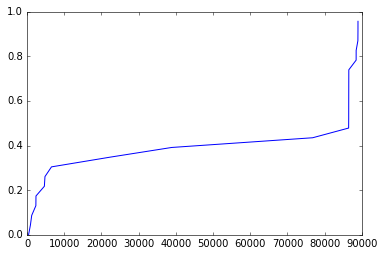

In [54]:
plt.plot(np.sort(s), np.linspace(0,1,len(s), endpoint=False))

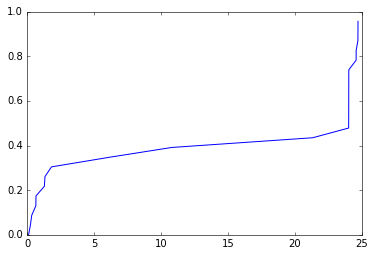

In [55]:
h=np.array(s)/3600.0
plt.plot(np.sort(h), np.linspace(0,1,len(h), endpoint=False))

In [56]:
dt=dateutil.parser.parse(string_time)

In [57]:
datetime.timedelta(dt, dt)

TypeError: unsupported type for timedelta seconds component: datetime.datetime

In [58]:
d=dt-dt

In [41]:
d.total_second

0.0

In [88]:
help(datetime.date)

Help on class date in module datetime:

class date(builtins.object)
 |  date(year, month, day) --> date object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(...)
 |      Formats self with strftime.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __radd__(self, value, /)
 |      Return value+self.
 |  
 |  __reduce__(...)
 |      __reduce__() -> (cls,

In [61]:
import numpy as np

In [81]:
xv=  np.arange(-10,10)
y = np.sinh(xv)

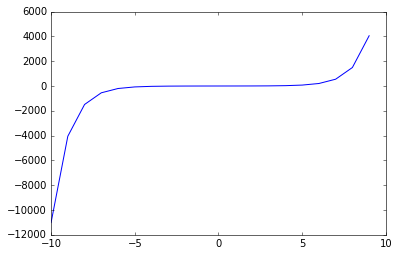

In [82]:
plt.plot(xv,y)

In [79]:
help(np.sinh)

Help on ufunc object:

sinh = class ufunc(__builtin__.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use np.info().  For
 |  example, np.info(np.sin).  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the "ufuncs.rst"
 |  file in the NumPy reference guide.
 |  
 |  Unary ufuncs:
 |  =============
 |  
 |  op(X, out=None)
 |  Apply op to X elementwise
 |  
 |  Parameters
 |  ----------
 |  X : array_like
 |      Input array.
 |  out : array_like
 |      An array to store the output. Must be the same shape as `X`.
 |  
 |  Returns
 |  -------
 |  r : array_like
 |      `r` will have the same shape as `X`; if out is provided, `r`
 |      will be equal to out.
 |  
 |  Binary ufuncs:
 |  ==============
 |  
 |  op(X, Y

In [80]:
np.info(np.sinh)

sinh(x[, out])

Hyperbolic sine, element-wise.

Equivalent to ``1/2 * (np.exp(x) - np.exp(-x))`` or
``-1j * np.sin(1j*x)``.

Parameters
----------
x : array_like
    Input array.
out : ndarray, optional
    Output array of same shape as `x`.

Returns
-------
y : ndarray
    The corresponding hyperbolic sine values.

Raises
------
ValueError: invalid return array shape
    if `out` is provided and `out.shape` != `x.shape` (See Examples)

Notes
-----
If `out` is provided, the function writes the result into it,
and returns a reference to `out`.  (See Examples)

References
----------
M. Abramowitz and I. A. Stegun, Handbook of Mathematical Functions.
New York, NY: Dover, 1972, pg. 83.

Examples
--------
>>> np.sinh(0)
0.0
>>> np.sinh(np.pi*1j/2)
1j
>>> np.sinh(np.pi*1j) # (exact value is 0)
1.2246063538223773e-016j
>>> # Discrepancy due to vagaries of floating point arithmetic.

>>> # Example of providing the optional output parameter
>>> out2 = np.sinh([0.1], out1)
>>> out2 is out1
True
